Required library imports

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn. datasets import make_circles

We create the dataset that we are going to try to classify. This problem cannot be solved directly with a perceptron, since the categories are not linearly separable.


In [ ]:
# We create the dataset

n = 500 # Number of samples
p = 2 # Number of features per sample

X,Y = make_circles(n_samples=n, noise = 0.1, factor=0.5)
Y = Y[:, np.newaxis]
X.shape

(500, 2)

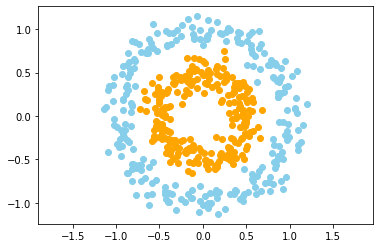

In [ ]:
# Plot of the different parts of the dataset we just created

plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c="skyblue")
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c="orange")
plt.axis("equal")
plt.show()

Now we must create the structure of our neural network.
Let's start by creating a class that defines each layer of our network.

The parameter number of connections (n_conn) refers to the number of entries (Connections from the previous layer). The parameter n_neur refers to the number of neurons in the current layer.

In [ ]:
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):

    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)*2 -1 # We randomly generate a vector with the biases of our layer
                                            # We assign them a normalized random initial value between -1 and 1
    self.W = np.random.rand(n_conn, n_neur)*2-1 # The same with the matrix of weights

We now create our activation function. We implemented both the sigmoid function and the relu function, to have them available later. Each function also includes its derivative, since as we know, we are going to need the derivative of the sigmoid function when calculating the gradient.

For example, in the function sigm we have a first element:

1 / (1+ np.e ** (-x))

for the sigmoid function, and a second lambda term x:

x*(1-x)

for its derivative.

We can access the sigmoid function or its derivative by simply doing sigm[0] and sigm[1]



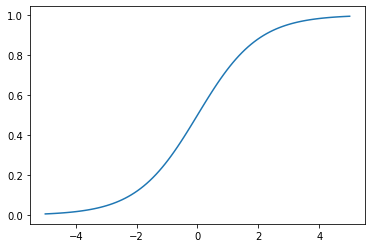

In [ ]:
sigm = (lambda x: 1 / (1+ np.e ** (-x)), lambda x: x*(1-x))
relu = (lambda x: x if x > 0 else 0, lambda x: 1 if x > 0 else 0)

# Let's plot both functions to see if everything is correct
_x = np.linspace(-5,5,100)
y = [sigm[0](i) for i in _x]
plt.plot(_x,y);

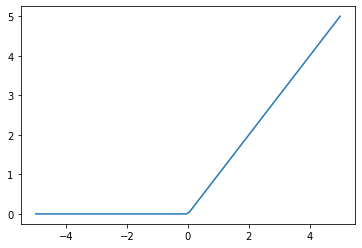

In [ ]:
y = [relu[0](i) for i in _x]
plt.plot(_x,y);

We now create a class that creates a neural network by adding layers. We are going to create a neural network with 5 internal layers, where p is our number of inputs, defined above, and 1 is an output layer with a single neuron.

In [ ]:
def create_nn(topology, act_f):
  
  nn = []

  for l, layer in enumerate(topology[:-1]):

    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn


So far we have been able to create a neural network. However, we haven't created any of the logic needed to train our neural network.

As we already talked about in the topic about neural networks, the training of the neural network has 3 differentiated steps.

1. A step forward, where we provide the network with input variables, let the network process them, and get an output.
2. The second element would be, once we have an output, we would compare it with the expected output (Y), using a cost function, which would allow us to measure the error in our network.
3. Finally, we would make use of the backpropagation to propagate this error backwards, calculating the partial derivatives and attributing a part of the error to each neuron, and we would minimize them using gradient descent.






In [ ]:
# Let's define the cost function as the root mean square error, which we saw in the theoretical part on neural networks

l2_cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2), lambda Yp, Yr: (Yp-Yr))

def train(neural_net, X, Y, l2_cost,lr=0.5, train=True):

  out = [(None,X)]
  # Step 1: Step forward
  for l, layer in enumerate(neural_net):

    # We start by doing the weighted sum
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    # Now we apply the activation function
    a = neural_net[l].act_f[0](z)

    out.append((z,a))

  # The last element of the out vector now contains the output of the network for each element
  
  
  # Step 2: Now we can use the cost function to calculate the error and update the weights
  
  if train:
    
    deltas = []

    for l in reversed(range(0,len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]


      if l == len(neural_net) - 1:
        # Step 2: We calculate the error with the cost function in the last layer
        deltas.insert(0,l2_cost[1](a,Y) * neural_net[l].act_f[1](a))
      else:
        # We calculate the error for the rest of the layers with the backpropagation formula
        deltas.insert(0,deltas[0] @ _W.T * neural_net[l].act_f[1](a))
        
        # We save the steps before using them to use them in the next update
      _W = neural_net[l].W

      # We update the parameters using gradient descent
      neural_net[l].b = neural_net[l].b - lr * np.mean(deltas[0], axis=0, keepdims=True)
      neural_net[l].W = neural_net[l].W - lr * out[l][1].T @ deltas[0]
    

  return out[-1][1]


Now that we've implemented the training process, let's iterate to iteratively update the weights. When the time comes, our neural network will have found a solution to the problem.

Although the code shown below seems long and complex, the important part, and that will take care of the training, is the following:

for i in range(5000):

  pY = train(neural_net, X, Y, l2_cost, lr=0.025)

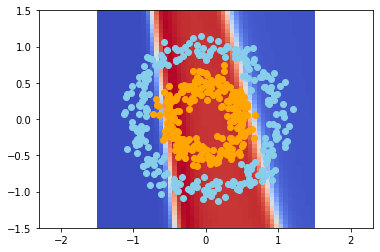

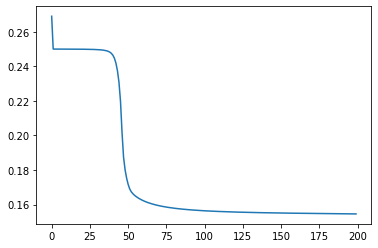

In [ ]:
# Let's test our neural network

import time
from IPython.display import clear_output

topology = [p,4,8,4,1]
neural_net = create_nn(topology, sigm)

loss = []

for i in range(5000):

  # We iterate on the training process!

  pY = train(neural_net, X, Y, l2_cost, lr=0.025)

  if i % 25 == 0:

    loss.append(l2_cost[0](pY,Y))

    print(loss[-1])

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5 ,1.5, res)

    _Y = np.zeros((res,res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0,i1] = train(neural_net, np.array([[x0,x1]]), Y, l2_cost, train=False)[0][0]
    plt.pcolormesh(_x0,_x1,_Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1], c="skyblue")
    plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1], c="orange")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)
